In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import  models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
image_size = 150
channels = 1

In [3]:
training_data = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 10,
    shear_range=0.1,
    zoom_range = 0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
)


In [4]:
train_gen = training_data.flow_from_directory(
    'Dataset_Split/train',
    target_size = (image_size,image_size),
    batch_size = 32,
    class_mode = 'sparse',
    color_mode = "grayscale",
)

Found 12342 images belonging to 31 classes.


In [5]:
val_data = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range= 10,
)

val_gen = val_data.flow_from_directory(
    'Dataset_Split/val',
    target_size=(image_size,image_size),
    batch_size=32,
    class_mode='sparse',
    color_mode = "grayscale",

)

Found 1572 images belonging to 31 classes.


In [6]:
test_data = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10

)
test_gen = test_data.flow_from_directory(
    'Dataset_Split/test',
    target_size=(image_size, image_size),
    batch_size = 32,
    class_mode='sparse',
    color_mode = "grayscale",
)

Found 1579 images belonging to 31 classes.


In [7]:
print(train_gen.class_indices)

{'Unknown': 0, 'ཀ': 1, 'ཁ': 2, 'ག': 3, 'ང': 4, 'ཅ': 5, 'ཆ': 6, 'ཇ': 7, 'ཉ': 8, 'ཏ': 9, 'ཐ': 10, 'ད': 11, 'ན': 12, 'པ': 13, 'ཕ': 14, 'བ': 15, 'མ': 16, 'ཙ': 17, 'ཚ': 18, 'ཛ': 19, 'ཝ': 20, 'ཞ': 21, 'ཟ': 22, 'འ': 23, 'ཡ': 24, 'ར': 25, 'ལ': 26, 'ཤ': 27, 'ས': 28, 'ཧ': 29, 'ཨ': 30}


In [8]:
class_names = list(train_gen.class_indices.keys())
class_names

['Unknown',
 'ཀ',
 'ཁ',
 'ག',
 'ང',
 'ཅ',
 'ཆ',
 'ཇ',
 'ཉ',
 'ཏ',
 'ཐ',
 'ད',
 'ན',
 'པ',
 'ཕ',
 'བ',
 'མ',
 'ཙ',
 'ཚ',
 'ཛ',
 'ཝ',
 'ཞ',
 'ཟ',
 'འ',
 'ཡ',
 'ར',
 'ལ',
 'ཤ',
 'ས',
 'ཧ',
 'ཨ']

In [9]:
input_shape = (image_size,image_size,channels)
class_labels = 31

model = models.Sequential([
    
    layers.InputLayer(input_shape = input_shape),
    # first layers of cnn
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    # second layers of cnn
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # third layers of cnn
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #fouth layers of cnn
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #flatten layers
    layers.Flatten(),
    
    #dense layers
    layers.Dense(64, activation= 'relu'),
    
    #out put layers
    layers.Dense(class_labels, activation='softmax'),
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
len(val_gen)

50

In [13]:
len(train_gen)

386

In [14]:
history = model.fit(
    train_gen,
    steps_per_epoch= len(train_gen),
    batch_size=16,
    validation_data=val_gen,
    validation_steps=len(val_gen),
    verbose = 1,
    epochs = 10,
)

Epoch 1/10
386/386 [==============================] - 395s 1s/step - loss: 2.0533 - accuracy: 0.3850 - val_loss: 0.8226 - val_accuracy: 0.7335
Epoch 2/10
386/386 [==============================] - 294s 761ms/step - loss: 0.7758 - accuracy: 0.7569 - val_loss: 0.4379 - val_accuracy: 0.8658
Epoch 3/10
386/386 [==============================] - 313s 811ms/step - loss: 0.4895 - accuracy: 0.8503 - val_loss: 0.3423 - val_accuracy: 0.8925
Epoch 4/10
386/386 [==============================] - 320s 830ms/step - loss: 0.3744 - accuracy: 0.8839 - val_loss: 0.2435 - val_accuracy: 0.9224
Epoch 5/10
386/386 [==============================] - 311s 804ms/step - loss: 0.3009 - accuracy: 0.9072 - val_loss: 0.1563 - val_accuracy: 0.9548
Epoch 6/10
386/386 [==============================] - 293s 759ms/step - loss: 0.2482 - accuracy: 0.9240 - val_loss: 0.1343 - val_accuracy: 0.9523
Epoch 7/10
386/386 [==============================] - 294s 763ms/step - loss: 0.2055 - accuracy: 0.9350 - val_loss: 0.1096 - va

In [15]:
 score = model.evaluate(test_gen)

50/50 [==============================] - 32s 655ms/step - loss: 0.1161 - accuracy: 0.9677


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss vs Validation loss')

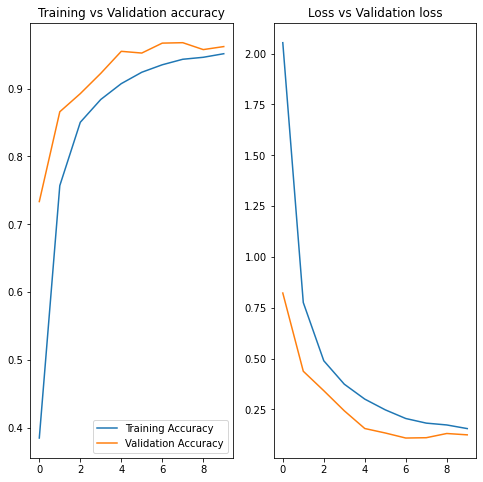

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs),val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training vs Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Loss')
plt.plot(range(epochs),val_loss,label = 'Validation loss')
plt.title('Loss vs Validation loss')


first image to predict
actual label: ཚ
1/1 [==============================] - 0s 411ms/step
predicted label: ཚ


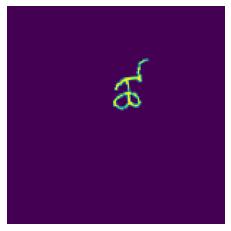

In [18]:
import numpy as np

for image_batch, label_batch in test_gen:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')
    
    break

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


C:\Users\Lab1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3933 (\N{TIBETAN LETTER WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lab1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3938 (\N{TIBETAN LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lab1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3939 (\N{TIBETAN LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lab1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3928 (\N{TIBETAN LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lab1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

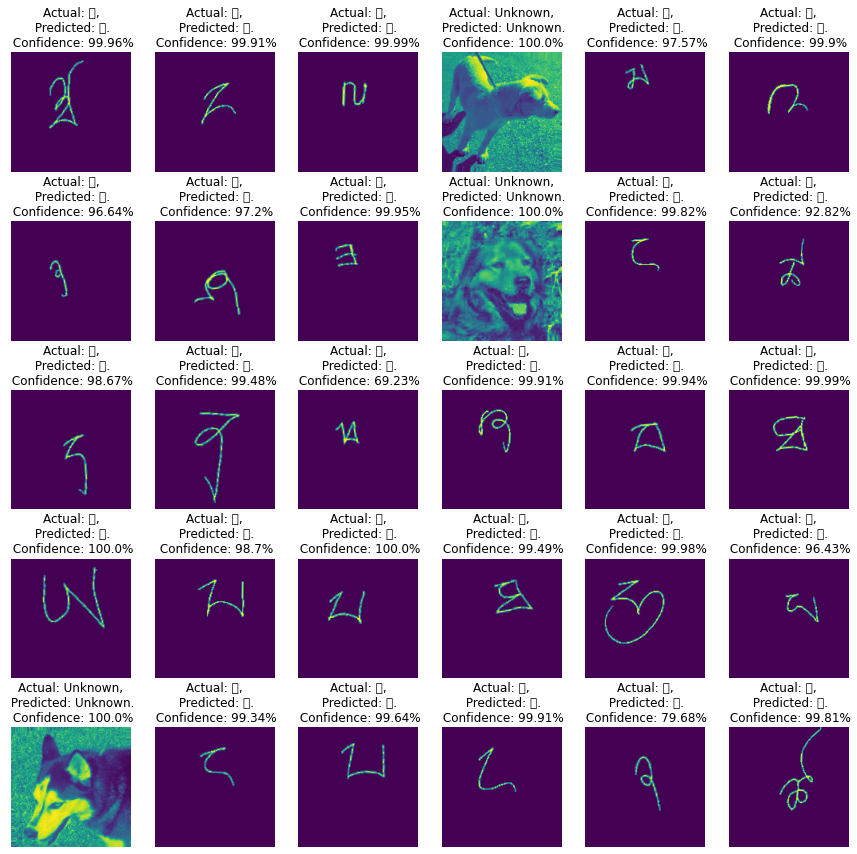

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_gen:
    for i in range(30):
        ax = plt.subplot(5, 6, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [21]:
model.save('Model_Handwriten.h5')

In [22]:
model.save("model")
saved_model_dir = "model/" 
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
model_lite = converter.convert()

with open("handwritten.tflite", 'wb') as f:
    f.write(model_lite)

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [23]:
labels = '\n' .join(sorted(
    train_gen.class_indices.keys()))
with open('labels.txt', 'w', encoding='utf-8') as f:
    f.write(labels)

[INFO] evaluating the model...
50/50 [==============================] - 8s 148ms/step


AttributeError: 'ImageDataGenerator' object has no attribute 'classes'

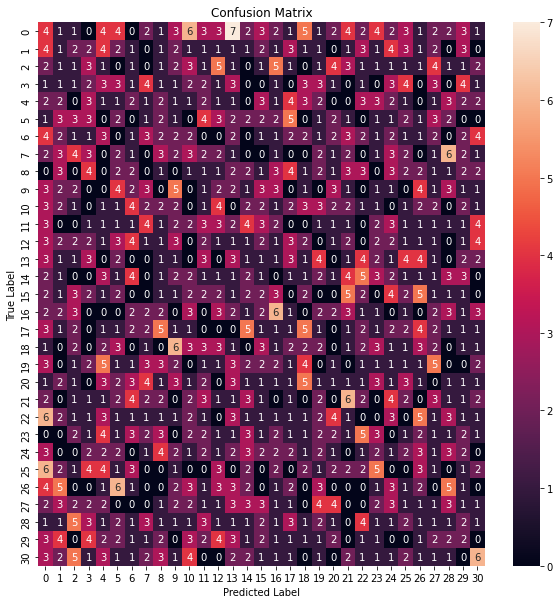

In [24]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
%matplotlib inline

# Reset the validation generator and evaluate the network after fine-tuning just the network head
print("[INFO] evaluating the model...")
test_gen.reset()
plt.figure(figsize=(10,10))
predIdxs = model.predict(test_gen, steps = len(test_gen))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_gen.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print(classification_report(test_data.classes, predIdxs, target_names=test_data.class_indices.keys()))